## Autoreload

In [1]:
%reload_ext autoreload
%autoreload 2

## Libraries

In [ ]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from IPython.display import display
from signalepy import settings, fourier, wavelet, ssi_cov, plot, plot_ly, utils
from collections import OrderedDict
from typing import Tuple,Dict, Union, List
from dataclasses import dataclass, field
from tqdm import tqdm
import gc

## Parameters

### Accceleration data

**File name and location**

In [3]:
file_name = 'cable_acceleration.txt'
file_location = utils.get_tests_files_location(file_name)


**Import acceleration data**

In [4]:
# Column names of the data
labels = ["X", "Y", "Z"] # + Acceleration
labels_corrected = ["X Corrected", "Y Corrected", "Z Corrected"] # + Acceleration
label = labels[2]
labels_filtered = ["X Filtered", "Y Filtered", "Z Filtered"] # + Acceleration
label_filtered = labels_filtered[2]

# Butterworth filter parameters
lowcut = 0.3  # Lower cutoff frequency (Hz)
highcut = 20  # Upper cutoff frequency (Hz)
order = 3  # Filter order

# FFT filtering
threshold = 20  # Threshold for filtering the FFT, as percentage of the maximum value

# time window for the data
start_time = 0
power_of_two = 12

# FFT normalization
magnitude_type = 'calculated'  # 'normalized' or 'calculated'
magnitude_factor = 10  # Factor for the magnitude normalization

# Files
file_name = 'cable_acceleration.txt'
file_location = utils.get_tests_files_location(file_name)

In [5]:
df_original = utils.import_sts_acceleration_txt(file_location, labels) # Import data for wavelets and fft analysis

In [6]:
df_ready = utils.SignalProcessor(df_original, labels, lowcut, highcut, order, start_time, power_of_two).execute_preparing_signal()

In [7]:
n = utils.estimate_power_of_two(df_original) # maximun exponent for the number of samples recomended for the fft
print(f'n = {n}')

n = 17


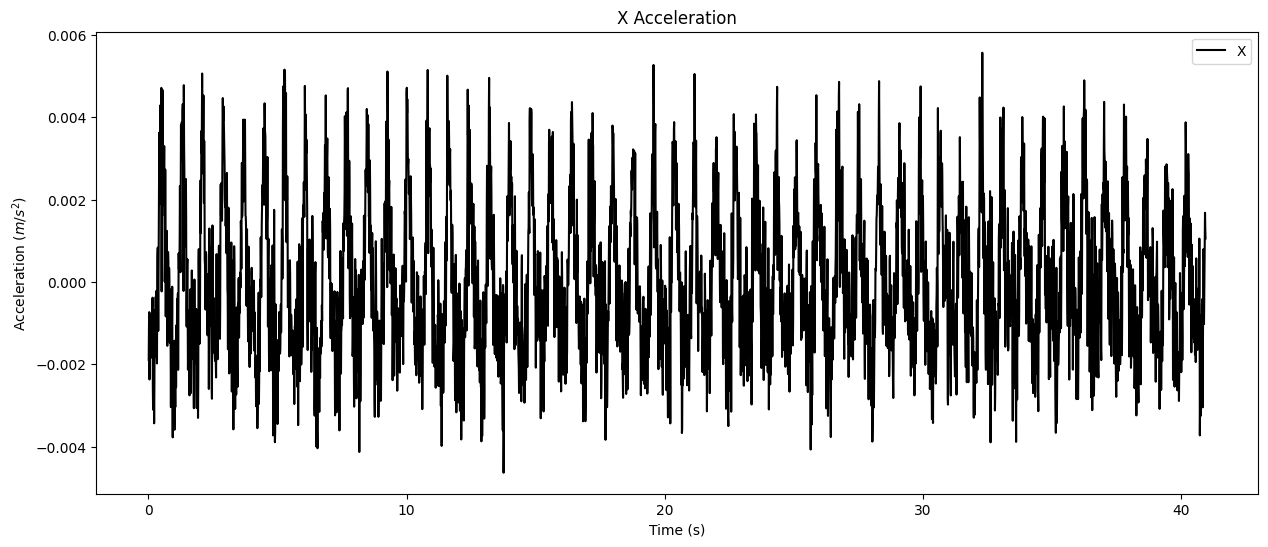

In [8]:
utils.plot_acceleration(df_ready, labels[0], color='black') # 0 for 'X', 1 for 'Y', 2 for 'Z'

In [9]:
utils.plotly_acceleration(df_ready, labels[0], color='black') # 0 for 'X', 1 for 'Y', 2 for 'Z'

## FFT analysis

In [10]:
df_fft= fourier.calculate_fft(df_ready, labels)

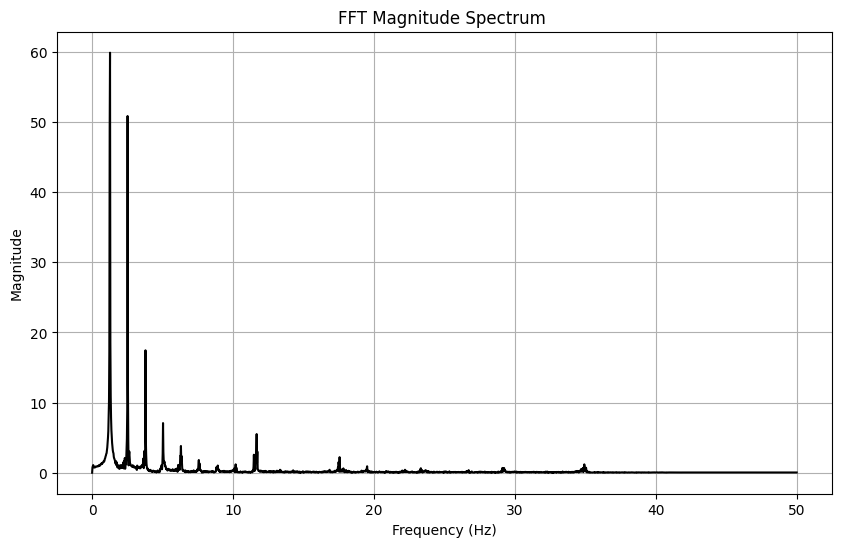

In [11]:
fourier.plot_fft_results(df_fft, label, 'k')

In [12]:
fourier.plotly_fft_results(df_fft, label, 'black')

In [13]:
df_filtered = fourier.filter_with_fft(df=df_ready, labels=labels, threshold=threshold)

In [14]:
df_fft_filtered = fourier.calculate_fft(df_filtered, labels_filtered, magnitude_type, magnitude_factor)

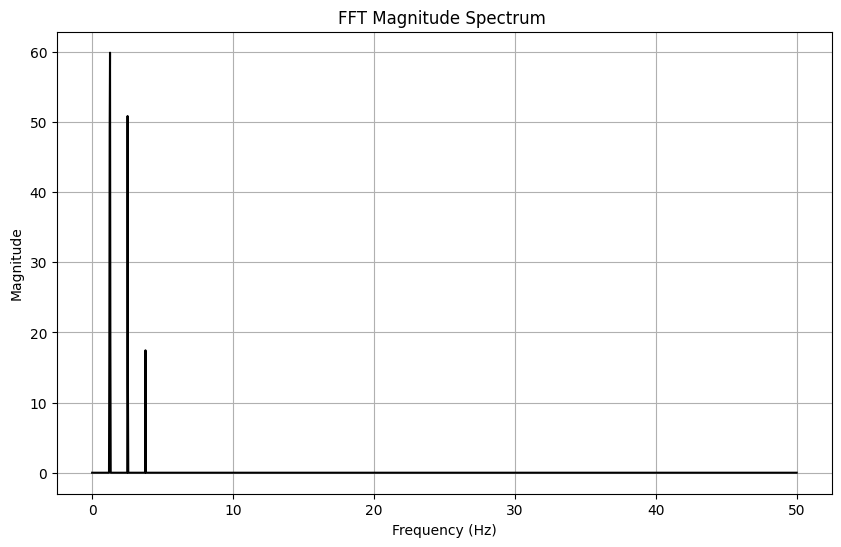

In [15]:
fourier.plot_fft_results(df_fft_filtered, label_filtered, 'k')

In [16]:
fourier.plotly_fft_results(df_fft_filtered, label_filtered, 'black')

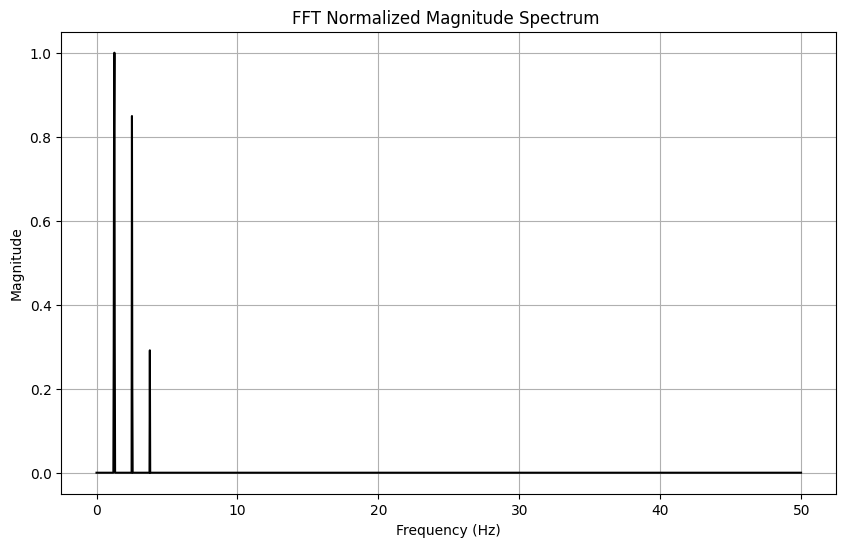

In [17]:
fourier.plot_normalized_fft_results(df_fft_filtered, label_filtered,'black')

In [18]:
fourier.plotly_normalized_fft_results(df_fft_filtered, label_filtered,'black')

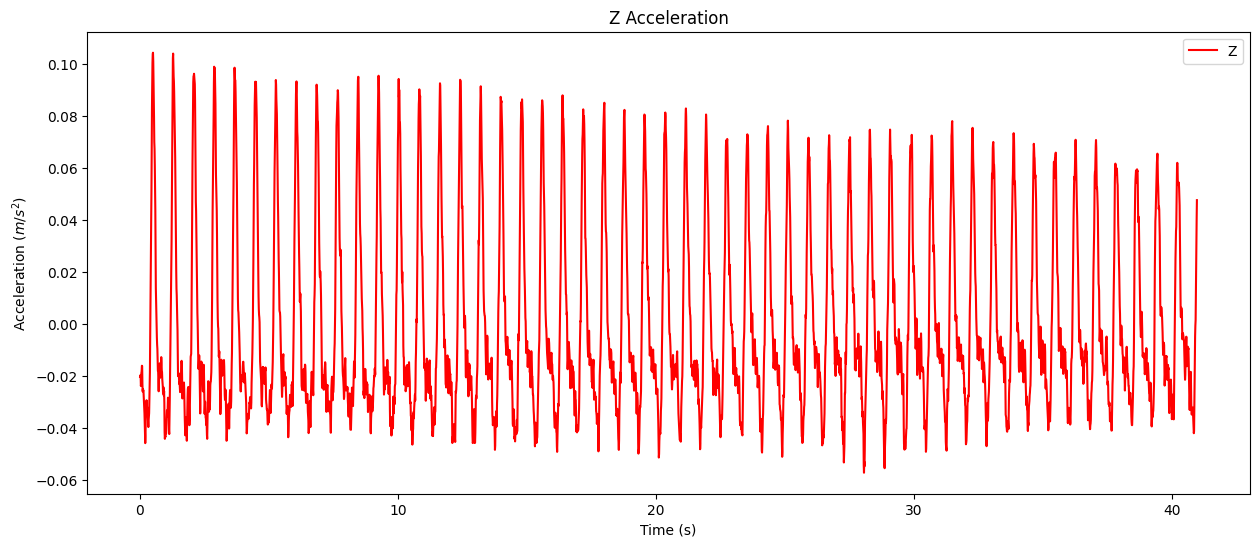

In [19]:
utils.plot_acceleration(df_ready, label)

In [20]:
utils.plotly_acceleration(df_ready, label)

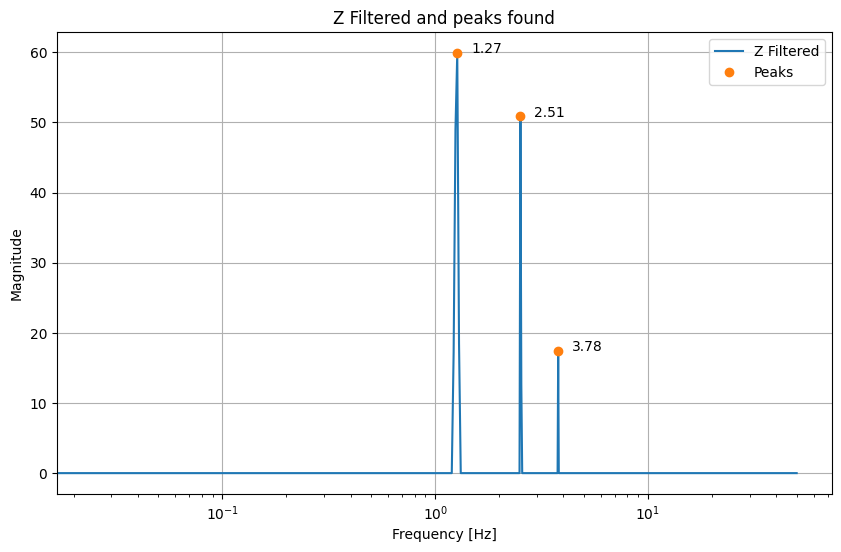

In [21]:
fourier.plot_peaks(df_fft_filtered, label_filtered, log_scale=True)

In [22]:
fourier.plotly_peaks(df_fft_filtered, label_filtered, log_scale=True)

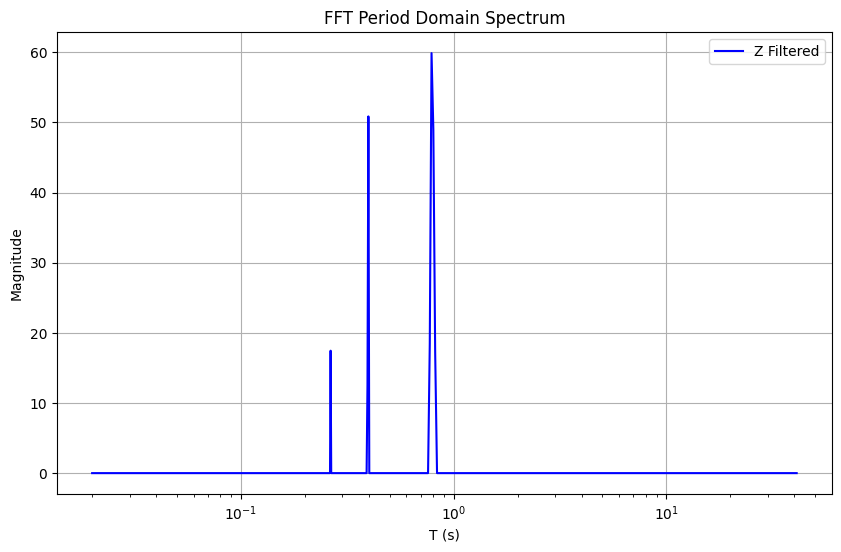

In [23]:
fourier.plot_fft_results_period_domain(df_fft_filtered, label_filtered, color='blue', log_scale=True)

In [24]:
fourier.plotly_fft_results_period_domain(df_fft_filtered, label_filtered, color='blue', log_scale=True)